## About the presentation
- We are in 370 during each session. Be there on time! We have pizzas. :)
- Check piazza for the rubric and sign up. There are still some empty slots.
- **Imagine what it is like for your audience!**
- Don't write too much text on the slides - noone reads it. Write short bullet points.
- Figures must have x and y labels, the characters must be readable from a distance, the objects of the graph must be visible.
- EDA figures:
   - three different visualization types!
   - e.g., one bar pot, one scatter plot, one heatmap.
   - if you only show bar plots, those are all of the same type and points will be subtracted.

## Mud card
- **Pls give more exercises on coordinates and p-criti**
   - in HW5 :)
- **What does accuracy refer to? the accuracy of the model?**
   - accuracy as the classification  metric (TP + TN) / (TP + TN + FP + FN)
   - accuracy as the predictive power of the model ("the model is accurate" meaning that it gives good predictions)

- **Is there a reason why you would change the value for epsilon in log loss?**
   - 1e-15 is used because python's float contains 16 significant digits (double precision)
      - 1e-15 has at least one significant digit
   - if you represent your numbers with a different precision level, you might want to adjust epsilon accordingly
      - e.g., single precision (8 significant digits), eps = 1e-7
- **It would be great if you could clarify logloss once again in the next class**
- **What is y_true in log loss**
- **Can you explain extreme cases in logloss?**

## The logloss metric

### <center>$logloss = - \frac{1}{N}\sum (y_{true}\ln(p_{pred}) + (1-y_{true})(1-\ln(1-p_{pred})))$</center>
- $p_{pred}$ is the predicted probability of the **positive class**
- the predicted probabilities are not converted into predicted classes
- two scenarios:
   - y_true = 0 - left term disappears
   - y_true = 1 - right term disappears
- log(0) is undefined
   - $p_{pred}$ is replaced with $\max(\min(p,1-10^{-15}),10^{-15})$ to avoid this issue

### The extreme cases
- the classifier is confidently wrong
   - $p_{pred} = 10^{-15}$ for points in class 1
   - $p_{pred} = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $p_{pred} = 10^{-15}$ for points in class 0
   - $p_{pred} = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>



In [1]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
df = pd.read_csv('data/true_labels_pred_probs.csv')

y_true = df['y_true']
pred_prob_class1 = df['pred_prob_class1']

print(log_loss(y_true,pred_prob_class1))
help(log_loss)

0.35015190545328556
Help on function log_loss in module sklearn.metrics.classification:

log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    Log loss, aka logistic loss or cross-entropy loss.
    
    This is the loss function used in (multinomial) logistic regression
    and extensions of it such as neural networks, defined as the negative
    log-likelihood of the true labels given a probabilistic classifier's
    predictions. The log loss is only defined for two or more labels.
    For a single sample with true label yt in {0,1} and
    estimated probability yp that yt = 1, the log loss is
    
        -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
    
    Read more in the :ref:`User Guide <log_loss>`.
    
    Parameters
    ----------
    y_true : array-like or label indicator matrix
        Ground truth (correct) labels for n_samples samples.
    
    y_pred : array-like of float, shape = (n_samples, n_classes) or (n_samples,)
        P

## Evaluation metrics in regression and gradient descent

By the end of this lecture, you will be able to
- Describe the most commonly used regression metrics
- Describe what the cost function is
- Explain how a simple gradient descent algorithm works

## <font color='LIGHTGRAY'>Evaluation metrics in regression and gradient descent</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe the most commonly used regression metrics**
- <font color='LIGHTGRAY'>Describe what the cost function is</font>
- <font color='LIGHTGRAY'>Explain how a simple gradient descent algorithm works</font>

## Regression metrics
- the target variable is continuous
- the predicted values are also continuous
- regression metrics measure some type of difference between y (true values) and y' (predicted values)
- three types of metrics:
    - unit of metric is different than the unit of targe variable
    - same units
    - dimensionless

### Mean Squared Error 

### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>

<center><img src="figures/polifit_1.jpg" width="450"></center>

#### The unit of MSE is not the same as the target variable.

### Root Mean Square Error

### <center>$RMSE(y,y') = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2}$</center>


### Mean Absolute Error

### <center>$MAE(y,y') = \frac{1}{n}\sum_{i=1}^{n}|y_i-y_i'|$</center>

#### Both RMSE and MAE have the same unit as the target variable.


## R2 score - coefficient of determination

### <center>$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,</center>
<center>where $\bar{y}$ is the mean of $y$.</center>

- R2 = 1 is the perfect regression model ($y == y'$)
- R2 = 0 is as good as a constant model that always predicts the expected value of y, $\bar{y}$
- R2 < 0 is a bad regression model

#### R2 is dimensionless.

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

- RMSE is not implemented in sklearn, but you can calculate it as `np.sqrt(mean_squared_error(y_true,y_pred))`
- you can find more on regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

## Exercise 1
Read in `data/reg_preds.csv`. It contains two columns: 

- y_true: value of owner-occupied homes in $1000's in Boston
- y_pred: predictions of a regression model

What's the ratio between the MSE and the variance of the home values? How does this ratio relate to the R2 score?

## <font color='LIGHTGRAY'>Evaluation metrics in regression and gradient descent</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the most commonly used regression metrics</font>
- **Describe what the cost function is**
- <font color='LIGHTGRAY'>Explain how a simple gradient descent algorithm works</font>

## Supervised ML algorithms
- What mathematical model is used to represent the data? What are the parameters of the model?
- How do we compare different parameter values of the same model? 
    - this is done with the cost function
    - WARNING!
       - the evaluation metric is used to compare different models!
       - the cost function compares different parameter values of the same model!
- What algorithm do we use to find the best model parameter values?
    - e.g., brute force, gradient descent, backpropagation

## Today
- The mathematical model is linear regression:
    ### <center>$y_i' = \theta_0 + x_{i1} \theta_1 + x_{i2} \theta_2 +$ ... $= \theta_0 + \sum_{j=1}^{m} \theta_j  x_{ij} $</center>
 <center>where $y_i'$ is the prediction of the linear regression model and $\theta$ are parameters.</center>
- The cost function is MSE
- We will find the best parameter values by brute force first, then simple gradient descent.

## Let's generate some data

In [6]:
# load packages and generate data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# the true function to generate y (gaussian noise is added later)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# fix the seed so code is reproducable
np.random.seed(10)

# generate n_samples points
n_samples = 30

# generate data
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1 # noise added here

In [7]:
df = pd.DataFrame()
for i in range(10):
    df['x'+str(i+1)] = X**(i+1)
df['y'] = y
print(df.head())
df.to_csv('data/regression_example.csv',index=False)

         x1        x2        x3            x4            x5            x6  \
0  0.771321  0.594936  0.458886  3.539483e-01  2.730076e-01  2.105764e-01   
1  0.020752  0.000431  0.000009  1.854537e-07  3.848527e-09  7.986443e-11   
2  0.633648  0.401510  0.254416  1.612103e-01  1.021507e-01  6.472758e-02   
3  0.748804  0.560707  0.419860  3.143926e-01  2.354184e-01  1.762822e-01   
4  0.498507  0.248509  0.123884  6.175684e-02  3.078622e-02  1.534715e-02   

             x7            x8            x9           x10         y  
0  1.624219e-01  1.252794e-01  9.663058e-02  7.453316e-02 -0.870922  
1  1.657343e-12  3.439309e-14  7.137237e-16  1.481116e-17  1.135022  
2  4.101452e-02  2.598878e-02  1.646774e-02  1.043476e-02 -1.015044  
3  1.320008e-01  9.884272e-02  7.401381e-02  5.542183e-02 -0.864701  
4  7.650660e-03  3.813908e-03  1.901260e-03  9.477913e-04 -0.728846  


In [8]:
def predict(X,theta):
    if len(np.shape(theta)) != 2:
        theta = np.array(theta)[np.newaxis,:] # just a numpy trick to make the dot product work
    y_pred = theta[0,0] + X.dot(theta[0,1:]) # intercept + theta_i*x_i
    return y_pred

def cost_function(X,y_true,theta):
    """
    Take in a numpy array X,y_true, theta and generate the cost function
    of using theta as parameter in a linear regression model
    """
    m = len(y)
    theta = np.array(theta)[np.newaxis,:] # just a numpy trick to make the dot product work in predict
    y_pred = predict(X,theta)
    cost = (1/m) * np.sum(np.square(y_true-y_pred)) # this is MSE
    return cost

### For simplicity, let's focus on x1 and y only!

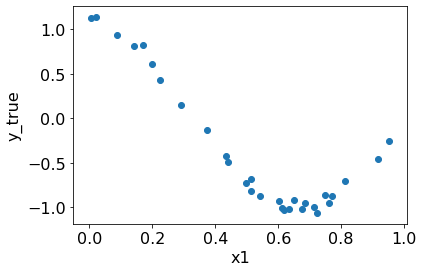

In [9]:
plt.scatter(df['x1'],df['y'])
plt.xlabel('x1')
plt.ylabel('y_true')
plt.savefig('figures/data.png',dpi=300)
plt.show()

#### <center>$y_i' = \theta_0 + x_{i1} \theta_1$</center>
- $\theta_0$ is the intercept
- $\theta_1$ is the slope

#### We are looking for the best fit line!

For a given $\theta$ vector, the cost function returns the MSE.

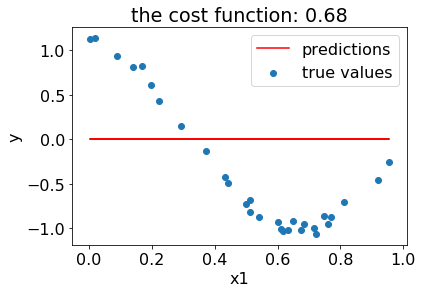

In [11]:
theta = [0,0] # intercept is theta[0], the slope is theta[1]

plt.scatter(df['x1'],df['y'],label='true values')
plt.plot(df['x1'],predict(df['x1'].values[:,np.newaxis],theta),label='predictions',color='r')
plt.title('the cost function: '+str(np.around(cost_function(df['x1'].values[:,np.newaxis],df['y'],theta),2)))
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.savefig('figures/line_fit.png',dpi=300)
plt.show()


## What we want:
- Find the theta vector that minimizes the cost function!
   - that's our best fit model
   
## How we do it:
- brute force
   - create a grid of theta[0] and theta[1] values
   - loop through all theta vectors on the grid
   - find the theta vector that comes with the smallest cost

In [12]:
n_vals = 101

theta0 = np.linspace(-5,5,n_vals) # the intercept values to explore
theta1 = np.linspace(-5,5,n_vals) # the slope values to explore

cost = np.zeros([len(theta0),len(theta1)]) # the cost function's value for each theta

# loop through all intercept-slope combinations and calculate the cost function
for i in range(n_vals):
    for j in range(n_vals):
        theta = [theta0[i],theta1[j]]
        cost[i,j] = cost_function(df['x1'].values[:,np.newaxis],df['y'],theta)
        
print('min(cost):',np.min(cost))
min_coords = np.unravel_index(cost.argmin(),np.shape(cost))
print('best intercept:',theta0[min_coords[0]])
print('best slope:',theta1[min_coords[1]])


min(cost): 0.14851645747269254
best intercept: 0.8000000000000007
best slope: -2.3


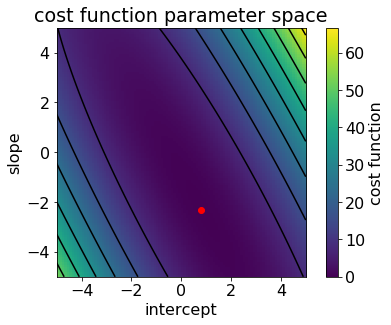

In [13]:
plt.figure(figsize=(6.4,4.8))
ax = plt.gca()
extent = (np.min(theta0),np.max(theta0),np.min(theta1),np.max(theta1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(theta0,theta1,cost.T,levels=10,colors='black')
plt.scatter(theta0[min_coords[0]],theta1[min_coords[1]],c='r')
ax.xaxis.set_ticks_position("bottom")
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function.png',dpi=300)
plt.show()

<center><img src="figures/cost_function.png" width="600"></center>


### The brute force approach works but...

- the number of theta vectors to loop through explodes with the number of features we have
   - with n features, we would need to loop through ~ $100^n$ theta vectors.
   - no guarantee that the best theta vector is within our grid.
- We need to use a smarter numerical method to find the best theta!
   - gradient descent to the rescue!

## <font color='LIGHTGRAY'>Evaluation metrics in regression and gradient descent</font>

<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the most commonly used regression metrics</font>
- <font color='LIGHTGRAY'>Describe what the cost function is</font>
- **Explain how a simple gradient descent algorithm works**

In [14]:
def gradient_descent(X,y_true,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y_true)
    theta = np.array(theta)[np.newaxis,:]

    cost_history = np.zeros(iterations)
    theta_history = np.zeros([iterations,np.shape(theta)[1]])
    for it in range(iterations):
        
        y_pred = predict(X,theta)
        delta_theta = np.zeros(np.shape(theta)) # the step we take 
        # the derivative of the cost function with respect to the intercept
        delta_theta[0,0] = (1/m) * sum(y_pred - y_true) *learning_rate
        # the derivative of the cost function with respect to the slopes * learning_rate
        delta_theta[0,1:] = (1/m)*learning_rate*( X.T.dot((y_pred - y_true)))
        theta = theta - delta_theta # update theta so we move down the gradient
        theta_history[it] = theta[0]
        cost_history[it] = cost_function(X,y_true,theta[0])
        
    return theta[0], cost_history, theta_history

In [15]:
theta,cost_history,theta_hist = gradient_descent(df['x1'].values[:,np.newaxis],df['y'],[5.0,5.0],0.05,1500)
print(theta)
print(theta_hist)

[ 0.81374506 -2.32315071]
[[ 4.60368338  4.77240776]
 [ 4.23299768  4.55868453]
 [ 3.88630699  4.35794734]
 ...
 [ 0.81353231 -2.3227565 ]
 [ 0.81363883 -2.32295387]
 [ 0.81374506 -2.32315071]]


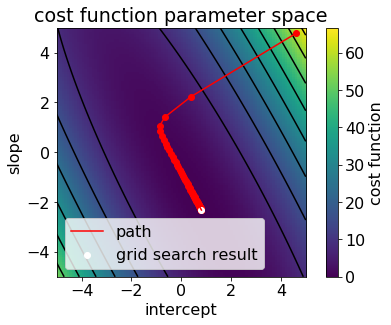

In [16]:
plt.figure(figsize=(6.4,4.8))
ax = plt.gca()
extent = (np.min(theta0),np.max(theta0),np.min(theta1),np.max(theta1))
fig = ax.imshow(cost.T,origin='lower',extent=extent,vmin=0)
plt.colorbar(fig,label='cost function')
ax.contour(theta0,theta1,cost.T,levels=10,colors='black')
plt.plot(theta_hist[::20,0],theta_hist[::20,1],color='r',label='path')
plt.scatter(theta_hist[::20,0],theta_hist[::20,1],c='r')
plt.scatter(theta0[min_coords[0]],theta1[min_coords[1]],c='w',label='grid search result')
ax.xaxis.set_ticks_position("bottom")
plt.legend()
plt.xlabel('intercept')
plt.ylabel('slope')
plt.title('cost function parameter space')
plt.tight_layout()
plt.savefig('figures/cost_function_with_path.png',dpi=300)
plt.show()

<center><img src="figures/cost_function_with_path.png" width="600"></center>

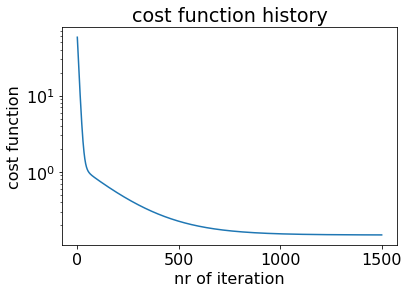

In [17]:
plt.plot(cost_history)
plt.semilogy()
plt.ylabel('cost function')
plt.xlabel('nr of iteration')
plt.title('cost function history')
plt.savefig('figures/cost_hist.png',dpi=300)
plt.show()

[ 1.17809286 -1.46079625 -9.6913062   7.82929009  7.59160438 -5.41564854]


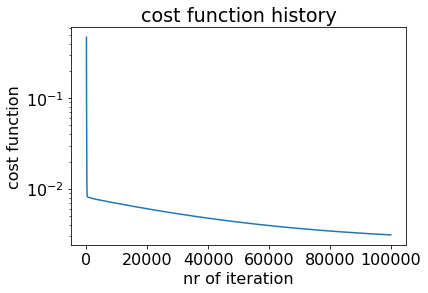

In [18]:
#theta,cost_history,theta_hist = gradient_descent(df[['x1','x2','x3','x4','x5']].values,df['y'],[1.1,-2.38,5.45,-44.7,75.33,-34.87],1.0,10000)
theta,cost_history,theta_hist = gradient_descent(df[['x1','x2','x3','x4','x5']].values,df['y'],[0,0,0,0,0,0],1.0,100000)
print(theta)

plt.plot(cost_history)
plt.semilogy()
plt.ylabel('cost function')
plt.xlabel('nr of iteration')
plt.title('cost function history')
plt.savefig('figures/cost_hist2.png',dpi=300)
plt.show()

By now you can
- Describe the most commonly used regression metrics
- Describe what the cost function is
- Explain how a simple gradient descent algorithm works
